<a href="https://colab.research.google.com/github/Kristyyy/covid-19-data/blob/master/Kristy_Data_Analysis_of_COVID_in_USA_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Fang Jung Lin (Kristy)
### Purpose: Data Analysis of COVID in USA

### Import all libraries

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
!pip install geopandas
import geopandas as gpd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 46.9MB/s 
     |████████████████████████████████| 14.7MB 312kB/s 


### Purpose of my analysis

Recently the world is facing with the outbreak of COVID19. From the analysis, I hope I can find out which state in U.S.A is the most servere and the overall trend in the period. I want to compare the most severe state with California, which I am now living at to find out the difference. I also want to find out will the increase of COVID cases increase the amount of deaths.

### Outline of the analysis

First, I will use geopandas to make a map to show which state has the higest cases and deaths. 

Second, I will analysis the data of the most severe state 

Third, analysis the state of California where I am now living at

Forth, compare the most severe state with California and find the difference between them. I will show the mean, standard deviation, and the time series. 

In the end, I will show the scatter plot with linear regression line of best fit to find out if there is any positive correlation between cases and deaths.

### Introduction to COVID dataset

The dataset I choose reveal the state data of COVID cumulative cases and deaths in America. The time period is from the outbreak to April 8th.

Features description:

date: From the outbreak of the COVID cases and deaths to April 8th

state: each state in America

fips: encode for each state, I will use it to merge the dataframe of geo dataset

cases: cumulative cases in America

deaths: cumulative deaths in America



### Load the Data
#### I find my data from https://github.com/nytimes/covid-19-data/blob/master/us-states.csv

In [0]:
# https://docs.google.com/spreadsheets/d/e/2PACX-1vRFzIwlOXA5FP4g4rxiwvm1nMQZhypWc1CXQ2xbU0GJjxqkIeZeqzMBkegkxe2MnOyqtLpUKbq6xIHG/pubhtml?gid=340926253&single=true
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRFzIwlOXA5FP4g4rxiwvm1nMQZhypWc1CXQ2xbU0GJjxqkIeZeqzMBkegkxe2MnOyqtLpUKbq6xIHG/pub?output=csv'
my_data = pd.read_csv(data_path)
my_data.shape

(2049, 5)

### Explore the Data

In [0]:
my_data.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [0]:
# Get the information about my_data
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2049 non-null   object
 1   state   2049 non-null   object
 2   fips    2049 non-null   int64 
 3   cases   2049 non-null   int64 
 4   deaths  2049 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 80.2+ KB


In [0]:
# Find if we have missing data
my_data.isnull().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [0]:
# Find the mean, var, std, and quratile
my_data.describe()

,fips,cases,deaths
count,2049.000000,2049.000000,2049.000000
mean,30.954124,1792.103953,45.832601
std,18.099142,8698.466106,282.313615
min,1.000000,1.000000,0.000000
25%,17.000000,8.000000,0.000000
50%,31.000000,95.000000,1.000000
75%,46.000000,719.000000,13.000000
max,78.000000,149401.000000,6268.000000


### Plot the Static Map of COVID Distribution in U.S.A 
In order to make it easier to find out which state has the relatively higher cases and deaths, I try to use geopandas to make it visualize. 

I find my data from: https://www2.census.gov/

In [0]:
# Upload the data
from google.colab import files

# Please manually upload following files:
# us_state_clean.cpg, us_state_clean.dbf, 
# us_state_clean.prj, us_state_clean.shp, 
# us_state_clean.shx

uploaded = files.upload()

Saving us_state_clean.cpg to us_state_clean (7).cpg
Saving us_state_clean.dbf to us_state_clean (7).dbf
Saving us_state_clean.prj to us_state_clean (7).prj
Saving us_state_clean.shp to us_state_clean (9).shp
Saving us_state_clean.shx to us_state_clean (7).shx


In [0]:
# Read the data
gdf = gpd.read_file('us_state_clean.shp')
gdf.head()

,GEOID,STUSPS,NAME,geometry
0,31,NE,Nebraska,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,WA,Washington,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,NM,New Mexico,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,SD,South Dakota,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,TX,Texas,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


In [0]:
# Remove Alaska, Guam and Hawaii from the datset
gdf = gdf[gdf['NAME']!='Alaska'][gdf['NAME']!='Hawaii'][gdf['NAME']!='Guam']

# Rename GEOID as fips
gdf = gdf.rename(columns= {'GEOID':'fips'})
gdf.head()

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:576: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


,fips,STUSPS,NAME,geometry
0,31,NE,Nebraska,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,WA,Washington,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,NM,New Mexico,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,SD,South Dakota,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,TX,Texas,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


In [0]:
# Extract 04/08 COVID cases and deaths data
map_df = my_data[my_data['date'] == '2020-04-08']
# Remove Alaska, Guam and Hawaii from map_df
map_df = map_df[map_df['state']!='Alaska'][map_df['state']!='Hawaii'][map_df['state']!='Guam']
map_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,date,state,fips,cases,deaths
1994,2020-04-08,Alabama,1,2499,67
1996,2020-04-08,Arizona,4,2726,80
1997,2020-04-08,Arkansas,5,1077,18
1998,2020-04-08,California,6,19043,506
1999,2020-04-08,Colorado,8,5655,192


In [0]:
# Info of gdf
gdf.info()

# Info of map_df
map_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 53 entries, 0 to 54
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fips      53 non-null     object  
 1   STUSPS    53 non-null     object  
 2   NAME      53 non-null     object  
 3   geometry  53 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1994 to 2048
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    52 non-null     object
 1   state   52 non-null     object
 2   fips    52 non-null     int64 
 3   cases   52 non-null     int64 
 4   deaths  52 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [0]:
# Merge gdf and map_df based on the 'fips' column
gdf['fips']=gdf['fips'].astype(int)
table = pd.merge(gdf, map_df, on ='fips')
table.head()

,fips,STUSPS,NAME,geometry,date,state,cases,deaths
0,31,NE,Nebraska,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",2020-04-08,Nebraska,538,14
1,53,WA,Washington,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",2020-04-08,Washington,9097,454
2,35,NM,New Mexico,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",2020-04-08,New Mexico,865,16
3,46,SD,South Dakota,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",2020-04-08,South Dakota,393,6
4,48,TX,Texas,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",2020-04-08,Texas,9900,195


Plot the COVID cases in USA

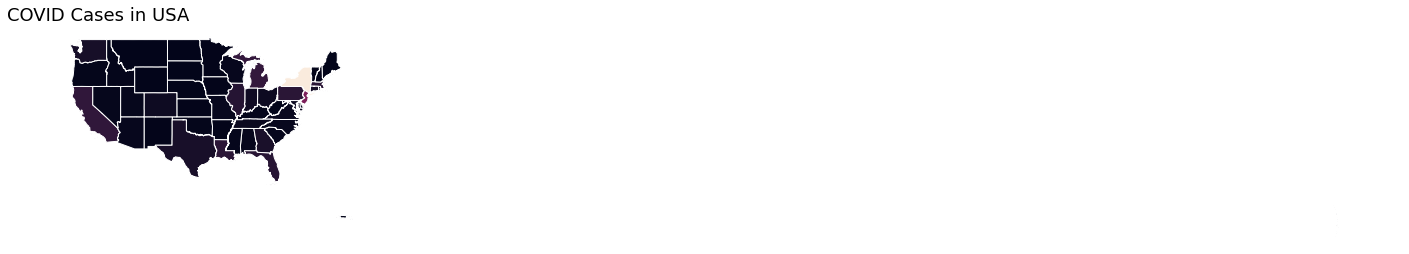

In [0]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(25, 25))

# Convert the coordinate system to web mercator to fit contextily basemap
field_gdf = table.to_crs('EPSG:3857')

# Plot the field polygons to the figure
sns.set(style='white', palette='muted', color_codes=True)
field_gdf.plot(ax=ax, column='cases', legend=False)
ax.axis('off')
ax.set_title('COVID Cases in USA', fontdict={'fontsize': '18', 'fontweight': '5'}, loc ='left')
plt.show()

Plot the COVID deaths in USA

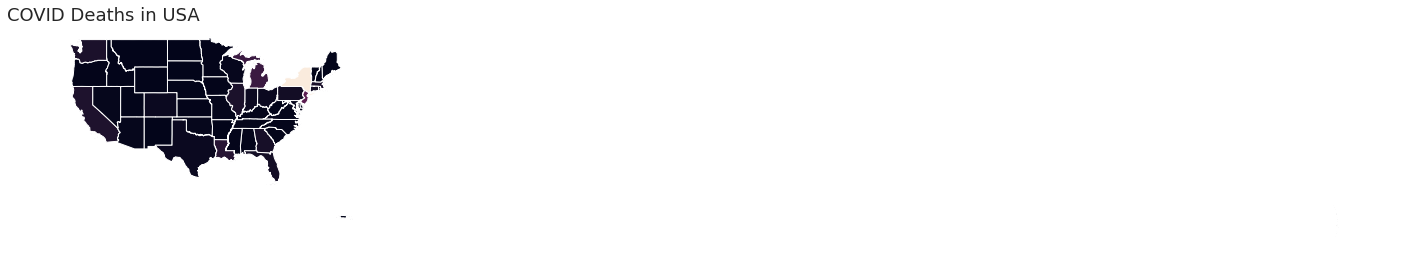

In [0]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(25, 25))

# Convert the coordinate system to web mercator to fit contextily basemap
field_gdf = table.to_crs('EPSG:3857')

# Plot the field polygons to the figure
sns.set(style='white', palette='muted', color_codes=True)
field_gdf.plot(ax=ax, column='deaths', legend=False)
ax.axis('off')
ax.set_title('COVID Deaths in USA', fontdict={'fontsize': '18', 'fontweight': '5'}, loc ='left')
plt.show()

### Find out which state has the highest and lowest cases and deaths

In [0]:
# Verify which state has the highest cases
max_idx = map_df.cases.idxmax()
map_df.loc[max_idx].state

'New York'

In [0]:
# Verify which state has the highest deaths
max_idx = map_df.deaths.idxmax()
map_df.loc[max_idx].state

'New York'

In [0]:
# Verify which state has the least cases
min_idx = map_df.cases.idxmin()
map_df.loc[min_idx].state

'Northern Mariana Islands'

In [0]:
# Verify which state has the least deaths
min_idx = map_df.deaths.idxmin()
map_df.loc[min_idx].state

'Wyoming'

### Convert index to date and sort the data by state

In order to make it easier for me to plot the data, I set the index to date and rearrange the order of state so that the same state will be put together.

In [0]:
# Set index to date
my_data.set_index('date', inplace= True)
my_data.index = pd.DatetimeIndex(my_data.index)
# Rearrange the order of state and date
my_data.sort_values(['state','date'], inplace= True)
my_data.head(10)

,state,fips,cases,deaths
date,,,,
2020-03-13,Alabama,1,6,0
2020-03-14,Alabama,1,12,0
2020-03-15,Alabama,1,23,0
2020-03-16,Alabama,1,29,0
2020-03-17,Alabama,1,39,0
2020-03-18,Alabama,1,51,0
2020-03-19,Alabama,1,78,0
2020-03-20,Alabama,1,106,0
2020-03-21,Alabama,1,131,0


### Cases and deaths analysis of New York

In [0]:
# Select New York data from state
newyork_data = my_data.loc[my_data['state'] == 'New York']
newyork_data.head()

,state,fips,cases,deaths
date,,,,
2020-03-01,New York,36,1,0
2020-03-02,New York,36,1,0
2020-03-03,New York,36,2,0
2020-03-04,New York,36,11,0
2020-03-05,New York,36,22,0


In [0]:
# select cases data from New York
newyork_cases = newyork_data[['cases']]
newyork_cases

,cases
date,
2020-03-01,1
2020-03-02,1
2020-03-03,2
2020-03-04,11
2020-03-05,22
2020-03-06,44
2020-03-07,89
2020-03-08,106
2020-03-09,142


In [0]:
# Compute daily cases of New York
newyork_daily_cases = newyork_cases.copy()

last_day_cases = 0
for i, row in newyork_cases.iterrows():
  newyork_daily_cases.at[i, 'cases'] = row.cases - last_day_cases
  last_day_cases = row.cases

newyork_daily_cases

# Rename the column 
newyork_daily_cases.rename(columns={'cases':'d_cases'})

,d_cases
date,
2020-03-01,1
2020-03-02,0
2020-03-03,1
2020-03-04,9
2020-03-05,11
2020-03-06,22
2020-03-07,45
2020-03-08,17
2020-03-09,36


In [0]:
# select deaths data from New York
newyork_deaths = newyork_data[['deaths']]
newyork_deaths

,deaths
date,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0
2020-03-06,0
2020-03-07,0
2020-03-08,0
2020-03-09,0


In [0]:
# Compute daily deaths of New York
newyork_daily_deaths = newyork_deaths.copy()

# Compute daily deaths of New York
last_day_deaths = 0
for i, row in newyork_deaths.iterrows():
  newyork_daily_deaths.at[i, 'deaths'] = row.deaths - last_day_deaths
  last_day_deaths = row.deaths

newyork_daily_deaths

# Rename the column 
newyork_daily_deaths.rename(columns={'deaths':'d_deaths'})

,d_deaths
date,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0
2020-03-06,0
2020-03-07,0
2020-03-08,0
2020-03-09,0


In [0]:
# Merge the dataframe of California with d_cases and d_deaths
ny_df = pd.merge(newyork_data, newyork_daily_cases, how='left', on='date')
ny_df = pd.merge(ny_df, newyork_daily_deaths, how='left', on='date')
ny_df = ny_df.rename(columns={'cases_x':'cases', 'deaths_x':'deaths','cases_y':'d_cases','deaths_y':'d_deaths'})
ny_df

,state,fips,cases,deaths,d_cases,d_deaths
date,,,,,,
2020-03-01,New York,36,1,0,1,0
2020-03-02,New York,36,1,0,0,0
2020-03-03,New York,36,2,0,1,0
2020-03-04,New York,36,11,0,9,0
2020-03-05,New York,36,22,0,11,0
2020-03-06,New York,36,44,0,22,0
2020-03-07,New York,36,89,0,45,0
2020-03-08,New York,36,106,0,17,0
2020-03-09,New York,36,142,0,36,0


In [0]:
# The date with highest cases
max_idx1 = ny_df.d_cases.idxmax()

# The date with highest deaths
max_idx2 = ny_df.d_deaths.idxmax()

print('The date with highest cases in NY',max_idx1)
print('The date with highest deaths in NY',max_idx2)

The date with highest cases in NY 2020-04-04 00:00:00
The date with highest deaths in NY 2020-04-07 00:00:00


### Plot the data of New York

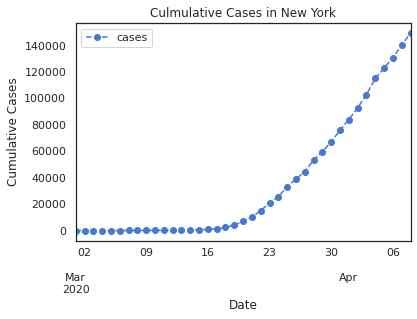

In [0]:
# Show the cumulative data of cases in New York
sns.set(style='white', palette='muted', color_codes=True)
newyork_cases.plot(title = 'Culmulative Cases in New York', linestyle='dashed', color='b', marker='o')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend(loc = 'upper left')

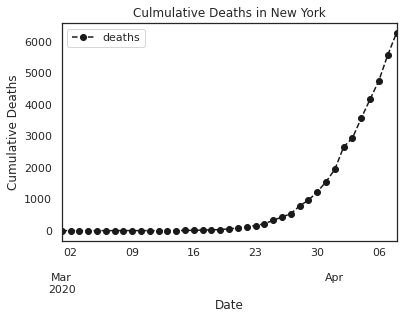

In [0]:
# Show the cumulative data of deaths in New York
sns.set(style='white', palette='muted', color_codes=True)
newyork_deaths.plot(title = 'Culmulative Deaths in New York', linestyle='dashed', color='k', marker='o')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.legend(loc = 'upper left')

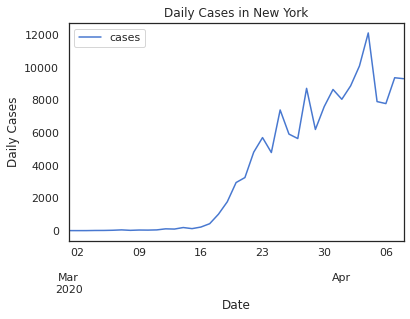

In [0]:
# Show the daily data of cases in New York
sns.set(style='white', palette='muted', color_codes=True)
newyork_daily_cases.plot(title = 'Daily Cases in New York', color='b')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.legend(loc = 'upper left')

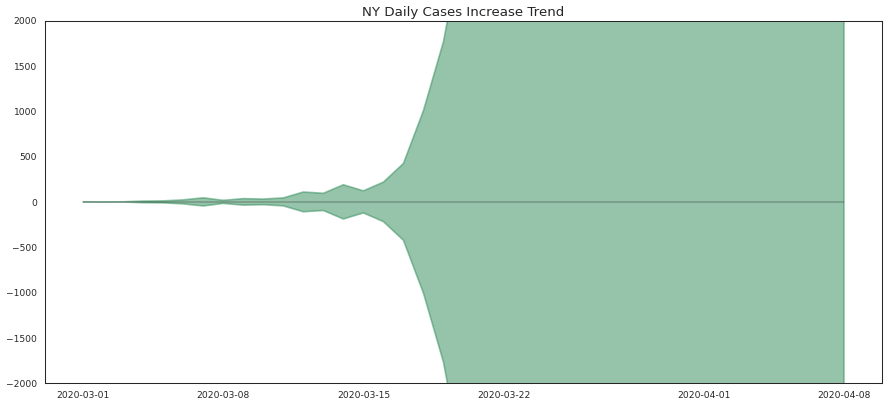

In [0]:
# Emphasize the Daily cases growth by showing both sides of the Y axis
ny1_df = ny_df.reset_index()
x = ny1_df['date'].values
y1 = ny1_df['d_cases'].values

fig, ax = plt.subplots(1, 1, figsize=(18,8), dpi= 60)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-2000, 2000)
plt.title('NY Daily Cases Increase Trend', fontsize=16)
plt.hlines(y=0, xmin=np.min(ny1_df.date), xmax=np.max(ny1_df.date), linewidth=.5)
plt.show()

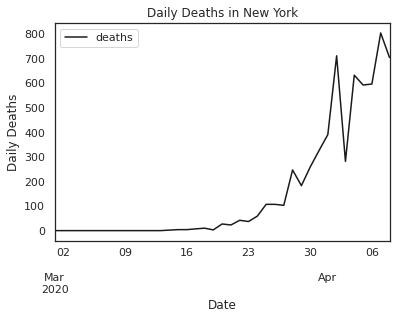

In [0]:
# Show the daily data of deaths in New York
sns.set(style='white', palette='muted', color_codes=True)
newyork_daily_deaths.plot(title = 'Daily Deaths in New York', color='k')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.legend(loc = 'upper left')

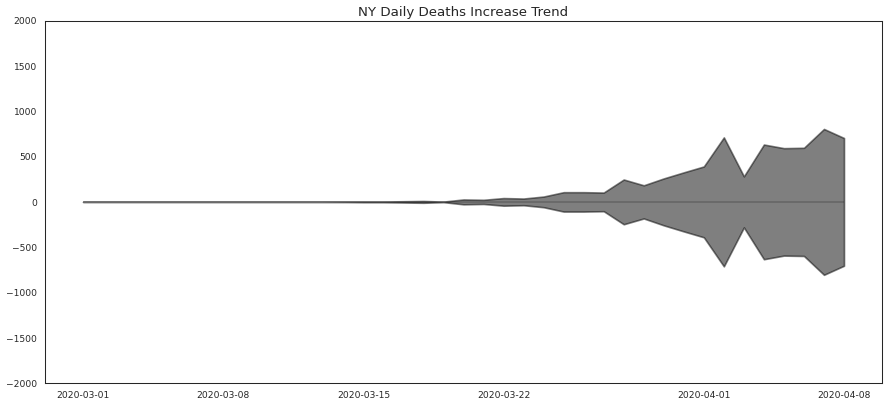

In [0]:
# Emphasize the Daily death growth by showing both sides of the Y axis
x = ny1_df['date'].values
y1 = ny1_df['d_deaths'].values

fig, ax = plt.subplots(1, 1, figsize=(18,8), dpi= 60)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='black')
plt.ylim(-2000, 2000)
plt.title('NY Daily Deaths Increase Trend', fontsize=16)
plt.hlines(y=0, xmin=np.min(ny1_df.date), xmax=np.max(ny1_df.date), linewidth=.5)
plt.show()

### Cases and deaths analysis of California



In [0]:
# Select California data from state
california_data = my_data.loc[my_data['state'] == 'California']
california_data.head()

,state,fips,cases,deaths
date,,,,
2020-01-25,California,6,1,0
2020-01-26,California,6,2,0
2020-01-27,California,6,2,0
2020-01-28,California,6,2,0
2020-01-29,California,6,2,0


In [0]:
# select cases data from California
california_cases = california_data[['cases']]
california_cases

,cases
date,
2020-01-25,1
2020-01-26,2
2020-01-27,2
2020-01-28,2
2020-01-29,2
...,...
2020-04-04,13796
2020-04-05,15076
2020-04-06,16284


In [0]:
# Compute daily cases of California
california_daily_cases = california_cases.copy()

last_day_cases = 0
for i, row in california_cases.iterrows():
  california_daily_cases.at[i, 'cases'] = row.cases - last_day_cases
  last_day_cases = row.cases

california_daily_cases

# Rename the column 
california_daily_cases.rename(columns={'cases':'d_cases'})

,d_cases
date,
2020-01-25,1
2020-01-26,1
2020-01-27,0
2020-01-28,0
2020-01-29,0
...,...
2020-04-04,1227
2020-04-05,1280
2020-04-06,1208


In [0]:
# select deaths data from California
california_deaths = california_data[['deaths']]
california_deaths

,deaths
date,
2020-01-25,0
2020-01-26,0
2020-01-27,0
2020-01-28,0
2020-01-29,0
...,...
2020-04-04,323
2020-04-05,349
2020-04-06,386


In [0]:
# Compute daily deaths of California
california_daily_deaths = california_deaths.copy()

last_day_deaths = 0
for i, row in california_deaths.iterrows():
  california_daily_deaths.at[i, 'deaths'] = row.deaths - last_day_deaths
  last_day_deaths = row.deaths

california_daily_deaths

# Rename the column 
california_daily_deaths.rename(columns={'deaths':'d_deaths'})

,d_deaths
date,
2020-01-25,0
2020-01-26,0
2020-01-27,0
2020-01-28,0
2020-01-29,0
...,...
2020-04-04,41
2020-04-05,26
2020-04-06,37


In [0]:
# Merge the dataframe of California with d_cases and d_deaths
cal_df = pd.merge(california_data, california_daily_cases, how='left', on='date')
cal_df = pd.merge(cal_df, california_daily_deaths, how='left', on='date')
cal_df = cal_df.rename(columns={'cases_x':'cases', 'deaths_x':'deaths','cases_y':'d_cases','deaths_y':'d_deaths'})
cal_df

,state,fips,cases,deaths,d_cases,d_deaths
date,,,,,,
2020-01-25,California,6,1,0,1,0
2020-01-26,California,6,2,0,1,0
2020-01-27,California,6,2,0,0,0
2020-01-28,California,6,2,0,0,0
2020-01-29,California,6,2,0,0,0
...,...,...,...,...,...,...
2020-04-04,California,6,13796,323,1227,41
2020-04-05,California,6,15076,349,1280,26
2020-04-06,California,6,16284,386,1208,37


In [0]:
# The date with highest cases
max_idx1 = cal_df.d_cases.idxmax()

# The date with highest deaths
max_idx2 = cal_df.d_deaths.idxmax()

print('The date with highest cases in CA',max_idx1)
print('The date with highest deaths in CA',max_idx2)

The date with highest cases in CA 2020-04-08 00:00:00
The date with highest deaths in CA 2020-04-07 00:00:00


### Plot the data of California

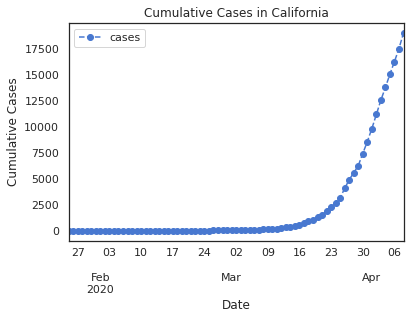

In [0]:
# Show the cumulative data of cases in California
sns.set(style='white', palette='muted', color_codes=True)
california_cases.plot(title = 'Cumulative Cases in California', linestyle='dashed', color='b', marker='o')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend(loc = 'upper left')

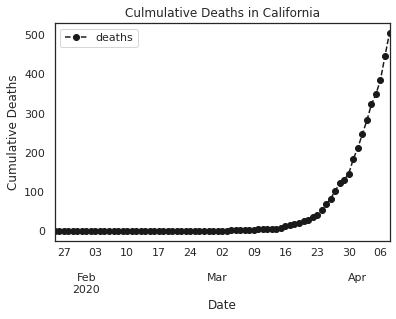

In [0]:
# Show the cumulative data of deaths in California
sns.set(style='white', palette='muted', color_codes=True)
california_deaths.plot(title = 'Culmulative Deaths in California', linestyle='dashed', color='k', marker='o')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.legend(loc = 'upper left')

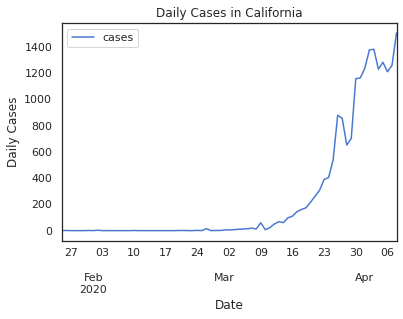

In [0]:
# Show the daily data of cases in California
sns.set(style='white', palette='muted', color_codes=True)
california_daily_cases.plot(title = 'Daily Cases in California', color='b')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.legend(loc = 'upper left')

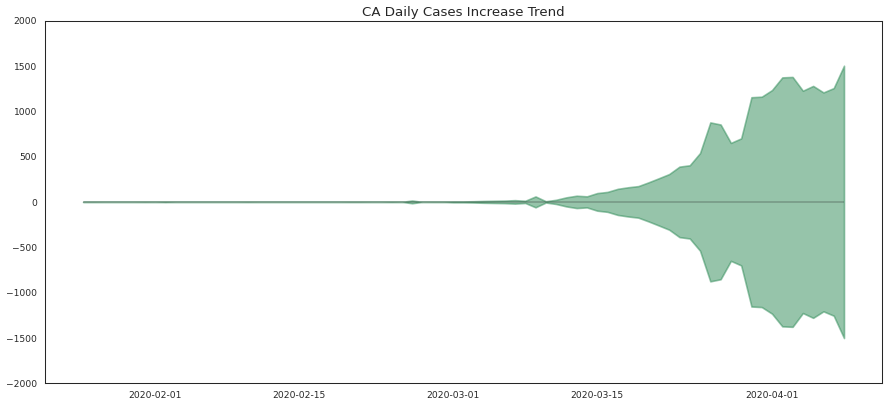

In [0]:
# Emphasize the Daily cases growth by showing both sides of the Y axis
cal_df1 = cal_df.reset_index()
x = cal_df1['date'].values
y1 = cal_df1['d_cases'].values

fig, ax = plt.subplots(1, 1, figsize=(18,8), dpi= 60)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-2000, 2000)
plt.title('CA Daily Cases Increase Trend', fontsize=16)
plt.hlines(y=0, xmin=np.min(cal_df1.date), xmax=np.max(cal_df1.date), linewidth=.5)
plt.show()

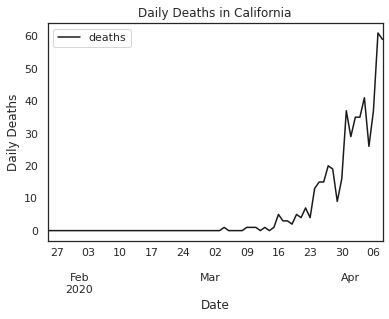

In [0]:
# Show the daily data of deaths in California
sns.set(style='white', palette='muted', color_codes=True)
california_daily_deaths.plot(title = 'Daily Deaths in California', color='k')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.legend(loc = 'upper left')

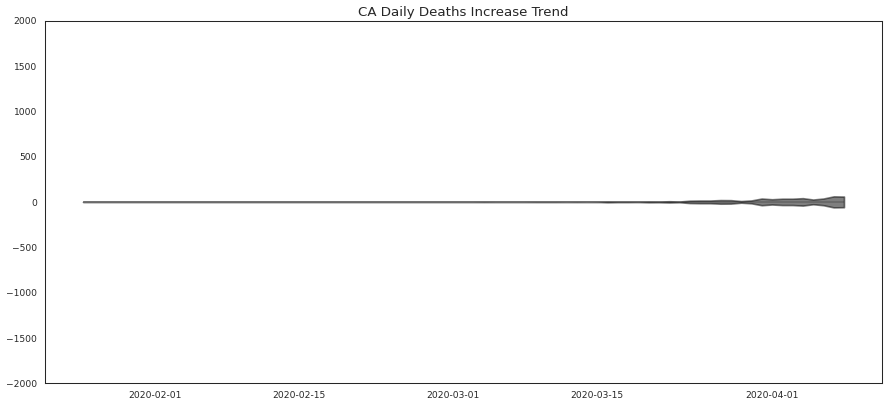

In [0]:
# Emphasize the Daily deaths growth by showing both sides of the Y axis
x = cal_df1['date'].values
y1 = cal_df1['d_deaths'].values

fig, ax = plt.subplots(1, 1, figsize=(18,8), dpi= 60)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='black')
plt.ylim(-2000, 2000)
plt.title('CA Daily Deaths Increase Trend', fontsize=16)
plt.hlines(y=0, xmin=np.min(cal_df1.date), xmax=np.max(cal_df1.date), linewidth=.5)
plt.show()

### Comparison between New York and California

In [0]:
# Merge New York and California dataframe
merge_df = pd.merge(ny_df, cal_df, how='left', on='date')
df = merge_df.rename(columns={'cases_x':'ny_cases', 'deaths_x':'ny_deaths','d_cases_x':'ny_d_cases','d_deaths_x':'ny_d_deaths',
                         'cases_y':'cal_cases', 'deaths_y':'cal_deaths', 'd_cases_y':'cal_d_cases', 'd_deaths_y':'cal_d_deaths'})
df.tail(10)

,state_x,fips_x,ny_cases,ny_deaths,ny_d_cases,ny_d_deaths,state_y,fips_y,cal_cases,cal_deaths,cal_d_cases,cal_d_deaths
date,,,,,,,,,,,,
2020-03-30,New York,36,67174,1224,7606,259,California,6,7421,146,1155,16
2020-03-31,New York,36,75832,1550,8658,326,California,6,8582,183,1161,37
2020-04-01,New York,36,83889,1941,8057,391,California,6,9816,212,1234,29
2020-04-02,New York,36,92770,2653,8881,712,California,6,11190,247,1374,35
2020-04-03,New York,36,102870,2935,10100,282,California,6,12569,282,1379,35
2020-04-04,New York,36,114996,3568,12126,633,California,6,13796,323,1227,41
2020-04-05,New York,36,122911,4161,7915,593,California,6,15076,349,1280,26
2020-04-06,New York,36,130703,4758,7792,597,California,6,16284,386,1208,37
2020-04-07,New York,36,140081,5563,9378,805,California,6,17540,447,1256,61


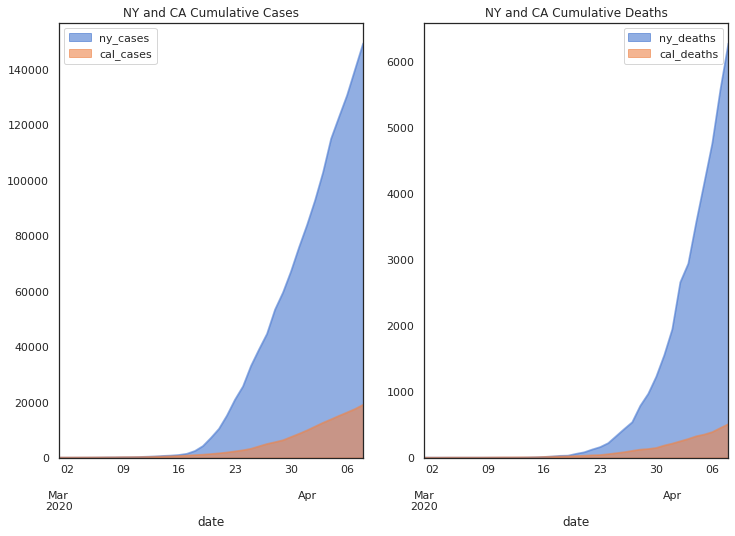

In [0]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

# Comparison between New York and California culmulative cases
sns.set(style='white', palette='muted', color_codes=True)
df1 = df[['state_x','ny_cases','state_y','cal_cases']]
df1.plot.area(ax=axes[0], title='NY and CA Cumulative Cases',stacked= False,alpha=0.6)

# Comparison between New York and California culmulative deaths
sns.set(style='white', palette='muted', color_codes=True)
df2 = df[['state_x','ny_deaths','state_y','cal_deaths']]
df2.plot.area(ax=axes[1],title = 'NY and CA Cumulative Deaths',stacked= False,alpha=0.6)

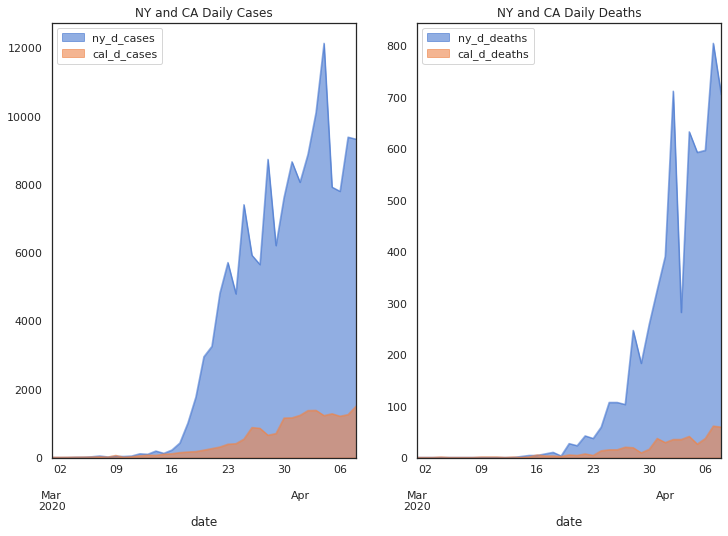

In [0]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

# Comparison between New York and California daily cases 
sns.set(style='white', palette='muted', color_codes=True)
df1 = df[['state_x','ny_d_cases','state_y','cal_d_cases']]
df1.plot.area(ax=axes[0], title='NY and CA Daily Cases',stacked= False,alpha=0.6)

# Comparison between New York and California daily deaths
sns.set(style='white', palette='muted', color_codes=True)
df2 = df[['state_x','ny_d_deaths','state_y','cal_d_deaths']]
df2.plot.area(ax=axes[1],title = 'NY and CA Daily Deaths',stacked= False,alpha=0.6)

In [0]:
# Compute the mean and standard deviation of daily cases and deaths in NY
print('Mean of NY Daily cases:', df['ny_d_cases'].mean())
print('Mean of NY Daily deaths:', df['ny_d_deaths'].mean())
print('Standard Deviation of NY Daily cases:', df['ny_d_cases'].std())
print('Standard Deviation of NY Daily deaths:', df['ny_d_deaths'].std())

Mean of NY Daily cases: 3830.7948717948716
Mean of NY Daily deaths: 160.71794871794873
Standard Deviation of NY Daily cases: 3941.429437329393
Standard Deviation of NY Daily deaths: 245.76378782523642


In [0]:
# Compute the mean and standard deviation of daily cases and deaths in CA
print('Mean of CA Daily cases:', df['cal_d_cases'].mean())
print('Mean of CA Daily deaths:', df['cal_d_deaths'].mean())
print('Standard Deviation of CA Daily cases:', df['cal_d_cases'].std())
print('Standard Deviation of CA Daily deaths:', df['cal_d_deaths'].std())

Mean of CA Daily cases: 487.56410256410254
Mean of CA Daily deaths: 12.974358974358974
Standard Deviation of CA Daily cases: 525.7867686105118
Standard Deviation of CA Daily deaths: 16.935616750205806


### Scatter plot with linear regression line of best fit

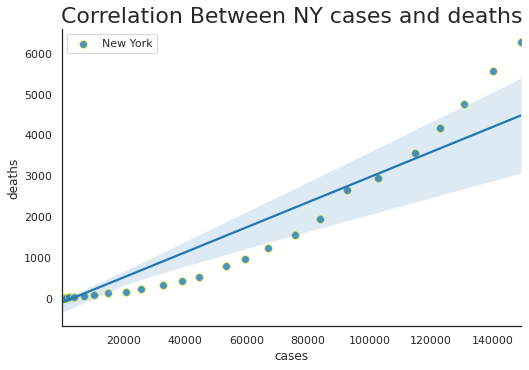

In [0]:
# Find if there is correlation between NY cases and deaths
sns.lmplot(x ='cases', y='deaths', hue ='state', data= ny_df[['state','cases','deaths']],
                     height=5, aspect=1.5, robust=True, palette='tab10',
                     scatter_kws= dict(s=60, linewidths=.7, edgecolors='yellow'), legend=False)
plt.legend(loc='upper left')
plt.title('Correlation Between NY cases and deaths', fontsize=22)
plt.show()

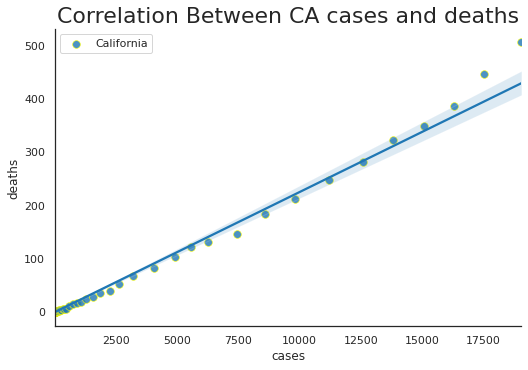

In [0]:
# Find if there is correlation between NY cases and deaths
sns.lmplot(x ='cases', y='deaths', hue ='state', data= cal_df[['state','cases','deaths']],
                     height=5, aspect=1.5, robust=True, palette='tab10',
                     scatter_kws= dict(s=60, linewidths=.7, edgecolors='yellow'), legend=False)
plt.legend(loc='upper left')
plt.title('Correlation Between CA cases and deaths', fontsize=22)
plt.show()

## Conclusion

From the analysis above, we can find that New York state is the most severe. The cases and deaths increase fast from the end of March, and the amount is still growing. The growing speed in Calfornia is also fast but the amout is much fewer than New York. I predict that the amount of cases and deaths in NY and CA will still be high for a while, but eventually the growing trend will flatten. From the scatter plot and linear regression of best fit we can conclude that the more the amount of cases the more the amount of deaths. Prey for New York. Hope New York can defeat the COVID soon!
